
# Question 1. Loading our data...

In [61]:
import zipfile
import pandas as pd
import torch
import numpy as np

In [62]:
# download dataset in colab env
!wget https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip -O data.zip

--2024-01-02 11:57:33--  https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.zip’

data.zip                [ <=>                ]  14.37K  --.-KB/s    in 0.008s  

2024-01-02 11:57:33 (1.70 MB/s) - ‘data.zip’ saved [14713]



In [63]:
# unzip data
with zipfile.ZipFile("data.zip", 'r') as my_zip:
  my_zip.extractall()

In [64]:
# read csv and parse to pandas
dataset_name = "synchronous machine.csv"
data = pd.read_csv(dataset_name, delimiter=";", thousands=',')
data[:5]

,Iy,PF,e,dIf,If
0,3,66,34,383,1563
1,3,68,32,372,1552
2,3,7,3,36,154
3,3,72,28,338,1518
4,3,74,26,317,1497


In [65]:
# get numpy data
numpy_data = data.values

In [66]:
#(b) Convert the Numpy array to PyTorch tensor, original data tensor.

original_data_tensor = torch.from_numpy(numpy_data)


##Question 2. Art of ”Tensor Manipulation”

In [67]:
# (a) Print the size of the dataset.
print('The size of the dataset is: ', original_data_tensor.shape)

The size of the dataset is:  torch.Size([557, 5])


   ### (b) Create a tensor, my pi tensor of same size as original data tensor containing values of 3.142 at every point and placed on your GPU device. Print the first 13 rows. Print tensor device location.Print tensor datatype.

In [68]:
#Create a tensor, my pi tensor of same size as original data tensor containing values of 3.142 at every point
my_pi_tensor = torch.tensor([557,7])
my_pi_tensor = torch.ones(557, 7) * 3.143

In [69]:
# Set the device to cuda if available
device = "cuda" if torch.cuda.is_available() else "cpu"

#Placing tensor tp GPU
my_pi_tensor = my_pi_tensor.to(device)

# Print the first 13 rows.
print(my_pi_tensor[:13])

#Print tensor device location.
print("The device location: ", device)

#Print tensor datatype.
print('The tensor datatype: ', my_pi_tensor.dtype)

tensor([[3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430],
        [3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430],
        [3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430],
        [3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430],
        [3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430],
        [3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430],
        [3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430],
        [3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430],
        [3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430],
        [3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430],
        [3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430],
        [3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430],
        [3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430, 3.1430]],
       device='cuda:0')
The device location:  cuda
The tensor datatype:  torch.float32


### (c) Print the fifth-root of the sum of all values in my pi tensor.

In [70]:
# (c) Print the fifth-root of the sum of all values in my pi tensor.
import math
tensor_sum = my_pi_tensor.sum() # Get the Sum
tensor_fift_root = pow(tensor_sum, 0.2) # Get the fift root
print('The fift-root is the tensor: ', tensor_fift_root)

The fift-root is the tensor:  tensor(6.5714, device='cuda:0')


## (d) Create a new tensor, my data tensor using the first and last 100 rows from the original data tensor. Print size of my data tensor. "[Expect a size of 200 rows]"

In [71]:
my_data_tensor1 = original_data_tensor[:100] # Get the first hundred rows
my_data_tensor2 = original_data_tensor[-100:] # Get the last hundred rows

# Combine the first and last handred rows and make th datatype float64
my_data_tensor = torch.cat((my_data_tensor1, my_data_tensor2), 0).type(torch.float64)

# print the shape of the combination
print('The shape of new tensor: ', my_data_tensor.shape)

The shape of new tensor:  torch.Size([200, 5])


## (e) Create two 1-D tensors, features and target from my data tensor. The feature is dIf (Changing of excitation current of synchronous machine) I) column and target is If (Excitation current of synchronous machine).

In [72]:
# Create two 1-D tensors
X = my_data_tensor.unsqueeze(dim=1)
x = X[:, :, 3] # creat feature of dIf column
y = X[:, :, -1] # creat target of If column
x.shape, y.shape, x.dtype, y.dtype

(torch.Size([200, 1]), torch.Size([200, 1]), torch.float64, torch.float64)

### (f) Split  data into training and test data of ratio 75:25 respectively.

In [73]:
# Create train/test by splitting
train_partition = int(0.75 * len(x)) # 75% of data used for training set, 25% for testing
X_train, y_train = x[:train_partition], y[:train_partition]
X_test, y_test = x[train_partition:], y[train_partition:]

len(X_train), len(y_train), len(X_test), len(y_test)

(150, 150, 50, 50)

# 2. PyTorch Workflow Fundamentals

In [74]:
# Question 3. Define your Linear model structure. You can use existing model.
from torch import nn # to import nn contains all of PyTorch's building blocks for neural networks
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      dtype=torch.float64,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model
torch.manual_seed(1234)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight',
               tensor([[-0.5363]], dtype=torch.float64)),
              ('linear_layer.bias', tensor([-0.8425], dtype=torch.float64))]))

In [75]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

### Question 4. Train model for any number of epochs. Generate 1 plot of Loss against Epoch during model training and testing. Choose any set of hyperparameters for model training.

In [76]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 300

# Create empty loss lists to track values
train_loss_val = []
test_loss_val = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_1.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_1(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_1.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_1(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float))

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_val.append(loss.detach().numpy())
            test_loss_val.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 1483.566702628428 | MAE Test Loss: 538.0153617568004 
Epoch: 10 | MAE Train Loss: 451.05893076125534 | MAE Test Loss: 398.9681492212673 
Epoch: 20 | MAE Train Loss: 446.8678425464686 | MAE Test Loss: 407.0668902578258 
Epoch: 30 | MAE Train Loss: 450.8005485390331 | MAE Test Loss: 398.4956692212673 
Epoch: 40 | MAE Train Loss: 446.6312914353575 | MAE Test Loss: 406.54993025782585 
Epoch: 50 | MAE Train Loss: 450.54216631681095 | MAE Test Loss: 398.0231892212674 
Epoch: 60 | MAE Train Loss: 446.3947403242464 | MAE Test Loss: 406.0329702578259 
Epoch: 70 | MAE Train Loss: 450.28378409458867 | MAE Test Loss: 397.5507092212675 
Epoch: 80 | MAE Train Loss: 446.15818921313524 | MAE Test Loss: 405.516010257826 
Epoch: 90 | MAE Train Loss: 450.0254018723666 | MAE Test Loss: 397.0782292212675 
Epoch: 100 | MAE Train Loss: 445.92163810202425 | MAE Test Loss: 404.99905025782607 
Epoch: 110 | MAE Train Loss: 449.76701965014433 | MAE Test Loss: 396.63990378210656 
Epoch: 

In [77]:
import matplotlib.pyplot as plt

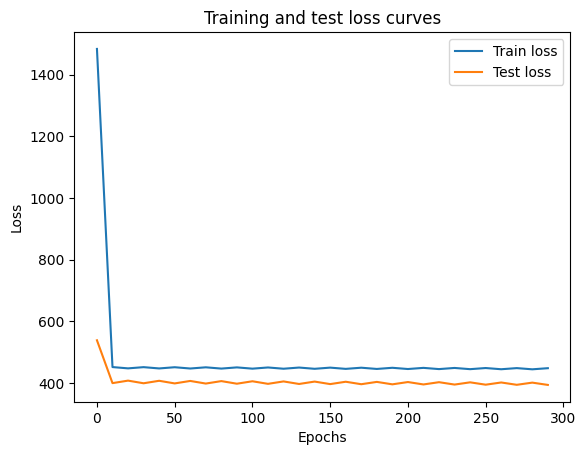

In [78]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_val, label="Train loss")
plt.plot(epoch_count, test_loss_val, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [79]:
print("The model learned the following values for weights and bias:")
print(model_1.state_dict())

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[4.4470]], dtype=torch.float64)), ('linear_layer.bias', tensor([0.4067], dtype=torch.float64))])


In [80]:
# 1. Set the model in evaluation mode
model_1.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_1(X_test)
y_preds

tensor([[2899.8518],
        [3033.2619],
        [2512.9627],
        [2557.4327],
        [2023.7925],
        [2094.9445],
        [2166.0965],
        [1543.5163],
        [1579.0923],
        [ 916.4891],
        [ 952.0651],
        [ 969.8531],
        [ 969.8531],
        [ 969.8531],
        [3384.5750],
        [3117.7549],
        [3215.5889],
        [2761.9947],
        [2850.9348],
        [2962.1098],
        [2450.7046],
        [ 249.4388],
        [1943.7464],
        [2019.3455],
        [2077.1565],
        [1454.5763],
        [1485.7053],
        [ 823.1020],
        [ 854.2310],
        [ 840.8900],
        [ 840.8900],
        [ 840.8900],
        [3420.1510],
        [3033.2619],
        [3171.1189],
        [2637.4787],
        [2766.4418],
        [2895.4048],
        [2335.0826],
        [2392.8936],
        [1783.6544],
        [1885.9354],
        [1992.6635],
        [ 129.3698],
        [1338.9542],
        [ 631.8809],
        [ 671.9040],
        [  71

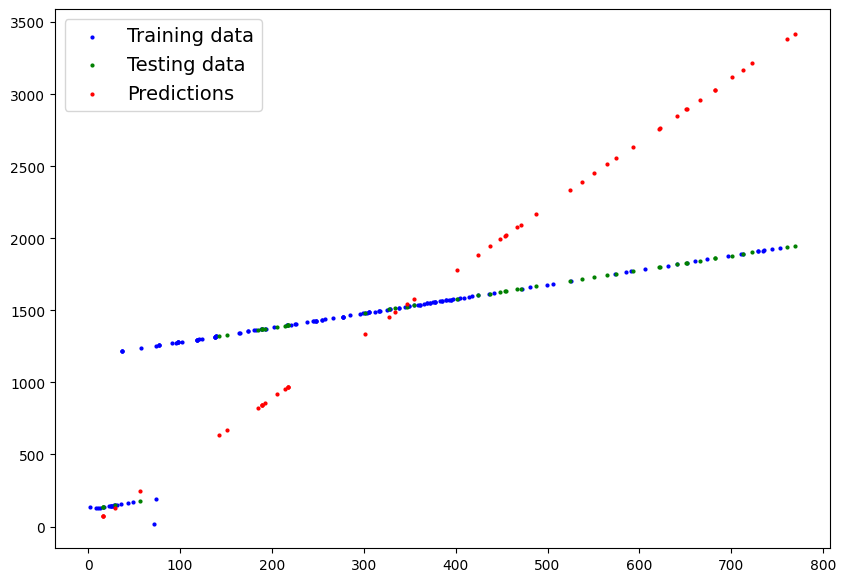

In [81]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions(predictions=y_preds)

### Question 5. Briefly comment on your results. What could be done to make the model or prediction better? (< 60 words)

## Comment:
#### The model used is possibly not suitable, or we should have a larger dataset to better train the model for better prediction.
